In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.drop(columns=['sepal length (cm)', 'sepal width (cm)'],inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


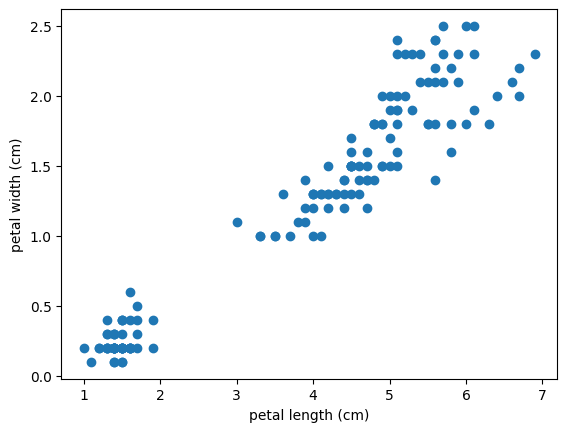

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt 

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

y_predict = km.fit_predict(df)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
df['cluster'] = y_predict
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


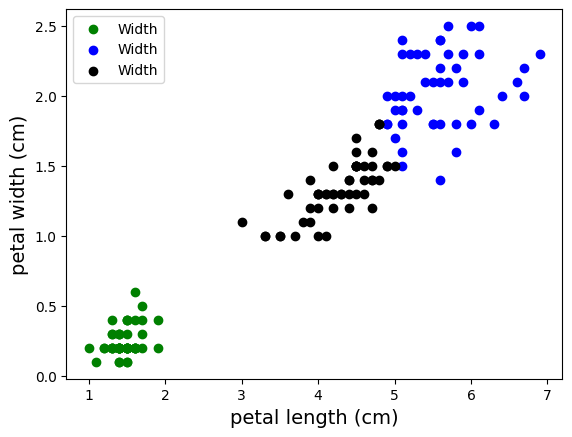

In [20]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.xlabel('petal length (cm)', fontsize=14)
plt.ylabel('petal width (cm)', fontsize=14)
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', label='Width')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', label='Width')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='black', label='Width')
plt.legend()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [28]:
km = KMeans(n_clusters=3)

y_predict = km.fit_predict(df.drop(['cluster'], axis='columns'))
df['cluster'] = y_predict
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [29]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

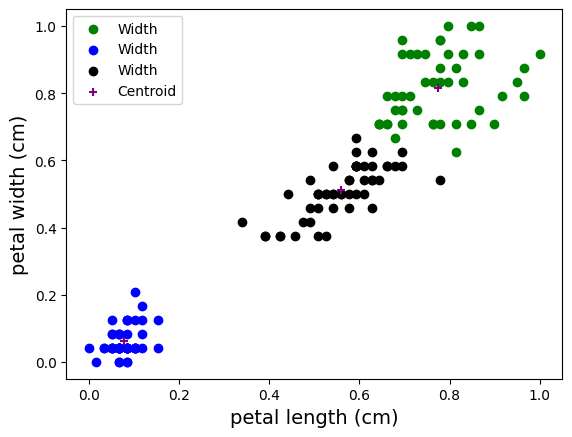

In [31]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.xlabel('petal length (cm)', fontsize=14)
plt.ylabel('petal width (cm)', fontsize=14)
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],
            color='green', label='Width')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],
            color='blue', label='Width')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],
            color='black', label='Width')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='+', label='Centroid')
plt.legend()

In [32]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

In [33]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.4666653700898558,
 0.8616150173815893,
 0.6889019224531716,
 0.5663174952054539,
 0.5976091029367563,
 0.41394074653734225]

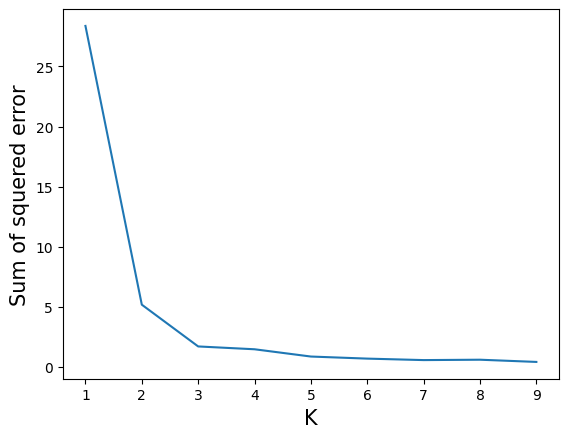

In [34]:
plt.ylabel('Sum of squered error', fontsize=15)
plt.xlabel('K', fontsize=15)
plt.plot(k_rng,sse)